In [1]:
import numpy as np
import pandas as pd

In [2]:

# Chỉ định mã hóa chính xác (ví dụ: 'latin1') khi đọc tệp CSV
all_data_cleaned = pd.read_csv('data 2024.csv')

# Hiển thị DataFrame
all_data_cleaned

,LAT,LON,YEAR,DOY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
0,18.25,103.25,2024,1,16.17,-999.0,-999,357.62,-999,-999,...,1.79,2.22,1.20,1.03,77.37,3.14,4.67,1.54,3.13,78.22
1,18.25,103.75,2024,1,16.17,-999.0,-999,357.62,-999,-999,...,1.72,2.15,1.15,1.00,64.97,3.07,4.46,1.61,2.84,66.25
2,18.25,104.25,2024,1,16.29,-999.0,-999,353.23,-999,-999,...,1.41,1.79,0.86,0.93,63.57,2.81,3.78,1.43,2.34,65.15
3,18.25,104.75,2024,1,16.29,-999.0,-999,353.23,-999,-999,...,1.25,1.64,0.81,0.83,65.71,2.58,3.39,1.59,1.80,67.63
4,18.25,105.25,2024,1,11.99,-999.0,-999,394.40,-999,-999,...,1.50,2.29,0.96,1.33,77.91,2.79,3.80,1.86,1.93,79.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,20.25,104.75,2024,52,-999.00,-999.0,-999,-999.00,-999,-999,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
2076,20.25,105.25,2024,52,-999.00,-999.0,-999,-999.00,-999,-999,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
2077,20.25,105.75,2024,52,-999.00,-999.0,-999,-999.00,-999,-999,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
2078,20.25,106.25,2024,52,-999.00,-999.0,-999,-999.00,-999,-999,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [3]:

# Tạo cột 'Kí hiệu' dựa trên giới hạn lượng mưa
all_data_cleaned['PRECTOTCORR_TODAY'] = pd.cut(all_data_cleaned['PRECTOTCORR'], 
                       bins=[-float('inf'), 0 , 6, 16, 50, 100, float('inf')],
                       labels=['no_rain','small_rain', 'rain', 'moderate_rain', 'heavy_rain', 'warning'])


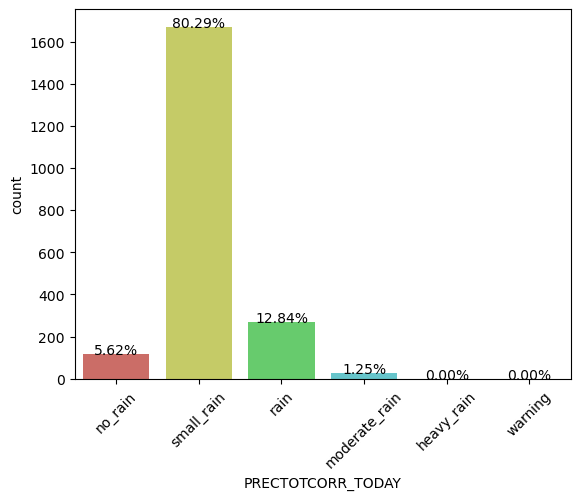

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Tạo count plot với xoay nhãn 45 độ
ax = sns.countplot(x="PRECTOTCORR_TODAY", data=all_data_cleaned, palette="hls")
plt.xticks(rotation=45)

# Tính phần trăm cho mỗi cột
total = float(len(all_data_cleaned["PRECTOTCORR_TODAY"]))
for p in ax.patches:
    height = p.get_height()
    percentage = (height/total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

# Hiển thị biểu đồ
plt.show()


In [5]:

# Số ngày bạn muốn dự đoán 
num_days_to_predict = 1

# Tạo các cột mới cho lượng mưa của ngày sau, 2 ngày sau, ..., 7 ngày sau
for i in range(1, num_days_to_predict + 1):
    col_name = f'PRECTOTCORR_{i}_DAY_AFTER'
    all_data_cleaned[col_name] = all_data_cleaned.groupby(['LAT', 'LON'])['PRECTOTCORR_TODAY'].shift(-i)

# In ra một số dòng đầu của dataframe với các cột mới
all_data_cleaned[['LAT', 'LON', 'DATE', 'PRECTOTCORR_TODAY'] + [f'PRECTOTCORR_{i}_DAY_AFTER' for i in range(1, num_days_to_predict + 1)]].head()



KeyError: "['DATE'] not in index"

In [ ]:
all_data_cleaned = all_data_cleaned.dropna(subset=['PRECTOTCORR_1_DAY_AFTER'])

In [ ]:
# Define the mapping dictionary
rain_mapping = {
    'no_rain' : 0,
    'small_rain': 1,
    'rain': 2,
    'moderate_rain': 3,
    'heavy_rain': 4,
    'warning': 5
}

# List of columns to apply mapping
columns_to_map = ['PRECTOTCORR_TODAY', 'PRECTOTCORR_1_DAY_AFTER']

# Apply mapping to each column
for column in columns_to_map:
    all_data_cleaned[column] = all_data_cleaned[column].replace(rain_mapping)

# List of columns to convert to float
columns_to_convert = ['PRECTOTCORR_TODAY', 'PRECTOTCORR_1_DAY_AFTER']

# Convert data types of the specified columns to float
for column in columns_to_convert:
    all_data_cleaned[column] = all_data_cleaned[column].astype(float)

# Check the result
all_data_cleaned


,LAT,LON,DATE,YEAR,MONTH,DAY,QV2M,RH2M,PRECTOTCORR,PS,...,WS2M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR_TODAY,PRECTOTCORR_1_DAY_AFTER
4,18.25,105.25,2000-01-01,2000,1,1,11.33,88.11,0.00,95.31,...,0.56,17.28,15.15,16.21,17.07,8.77,22.52,13.75,NaN,0.0
5,18.25,105.75,2000-01-01,2000,1,1,12.05,89.94,0.00,98.17,...,1.22,18.32,16.57,17.44,17.99,7.04,22.60,15.55,NaN,0.0
6,18.25,106.25,2000-01-01,2000,1,1,12.88,88.97,0.00,100.92,...,2.16,19.99,18.08,19.04,20.03,4.09,22.37,18.28,NaN,0.0
7,18.25,106.75,2000-01-01,2000,1,1,13.12,85.02,0.00,101.37,...,3.13,21.04,18.43,19.73,21.49,1.65,21.88,20.23,NaN,0.0
45,18.25,105.75,2000-01-02,2000,1,2,11.86,91.43,0.02,98.24,...,1.67,17.69,16.29,16.99,17.69,7.48,21.88,14.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345955,20.25,104.75,2023-10-21,2023,10,21,10.82,79.52,0.12,94.18,...,0.42,18.00,14.27,16.13,17.61,7.06,21.74,14.68,0.0,1.0
345956,20.25,105.25,2023-10-21,2023,10,21,11.53,80.28,0.24,97.66,...,1.69,19.35,15.78,17.56,19.13,6.25,22.45,16.19,0.0,1.0
345957,20.25,105.75,2023-10-21,2023,10,21,12.68,81.65,0.50,100.77,...,3.63,21.10,17.77,19.43,21.38,5.73,23.83,18.11,0.0,1.0
345958,20.25,106.25,2023-10-21,2023,10,21,13.49,81.50,1.25,101.68,...,5.00,22.24,18.92,20.58,23.49,4.40,24.34,19.94,1.0,1.0


In [ ]:
all_data_cleaned['DATE'] = pd.to_datetime(all_data_cleaned['DATE'])

# Hiển thị thông tin sau khi chuyển đổi
all_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297520 entries, 4 to 345959
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   LAT                      297520 non-null  float64       
 1   LON                      297520 non-null  float64       
 2   DATE                     297520 non-null  datetime64[ns]
 3   YEAR                     297520 non-null  int64         
 4   MONTH                    297520 non-null  int64         
 5   DAY                      297520 non-null  int64         
 6   QV2M                     297520 non-null  float64       
 7   RH2M                     297520 non-null  float64       
 8   PRECTOTCORR              297520 non-null  float64       
 9   PS                       297520 non-null  float64       
 10  WS10M                    297520 non-null  float64       
 11  WS10M_MAX                297520 non-null  float64       
 12  WS10M_MIN            

In [ ]:
all_data_cleaned

,LAT,LON,DATE,YEAR,MONTH,DAY,QV2M,RH2M,PRECTOTCORR,PS,...,WS2M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR_TODAY,PRECTOTCORR_1_DAY_AFTER
4,18.25,105.25,2000-01-01,2000,1,1,11.33,88.11,0.00,95.31,...,0.56,17.28,15.15,16.21,17.07,8.77,22.52,13.75,NaN,0.0
5,18.25,105.75,2000-01-01,2000,1,1,12.05,89.94,0.00,98.17,...,1.22,18.32,16.57,17.44,17.99,7.04,22.60,15.55,NaN,0.0
6,18.25,106.25,2000-01-01,2000,1,1,12.88,88.97,0.00,100.92,...,2.16,19.99,18.08,19.04,20.03,4.09,22.37,18.28,NaN,0.0
7,18.25,106.75,2000-01-01,2000,1,1,13.12,85.02,0.00,101.37,...,3.13,21.04,18.43,19.73,21.49,1.65,21.88,20.23,NaN,0.0
45,18.25,105.75,2000-01-02,2000,1,2,11.86,91.43,0.02,98.24,...,1.67,17.69,16.29,16.99,17.69,7.48,21.88,14.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345955,20.25,104.75,2023-10-21,2023,10,21,10.82,79.52,0.12,94.18,...,0.42,18.00,14.27,16.13,17.61,7.06,21.74,14.68,0.0,1.0
345956,20.25,105.25,2023-10-21,2023,10,21,11.53,80.28,0.24,97.66,...,1.69,19.35,15.78,17.56,19.13,6.25,22.45,16.19,0.0,1.0
345957,20.25,105.75,2023-10-21,2023,10,21,12.68,81.65,0.50,100.77,...,3.63,21.10,17.77,19.43,21.38,5.73,23.83,18.11,0.0,1.0
345958,20.25,106.25,2023-10-21,2023,10,21,13.49,81.50,1.25,101.68,...,5.00,22.24,18.92,20.58,23.49,4.40,24.34,19.94,1.0,1.0


In [ ]:
#In dữ liệu ra file csv
all_data_cleaned.to_csv(r'C:\\Users\\Admin\\Downloads\\Học tập\\Đồ án 2\\code\\Project DA2\\data_2024_final.csv', index=False)